Phase 2

In [63]:
import os
import json
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image


WARNING Ultralytics settings reset to default values. This may be due to a possible problem with your settings or a recent ultralytics package update. 
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\AARUSHI TANDON\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [64]:
IMAGE_DIR = r"C:\Users\AARUSHI TANDON\Downloads\all_images (1)"
OUTPUT_JSON = "detected_labels.json"
MODEL_PATH = "yolov8n.pt"  # lightweight, accurate enough

model = YOLO(MODEL_PATH)


100%|█████████████████████████████████████████████████████████████████████████████| 6.25M/6.25M [00:01<00:00, 4.11MB/s]


In [65]:
# -------- Helper Function to Predict and Save Labels --------
def detect_and_label(image_path):
    results = model(image_path)[0]
    objects = list({model.names[int(cls)] for cls in results.boxes.cls})
    return objects


In [66]:
# -------- Traverse and Label All Images --------
all_results = []

for folder in os.listdir(IMAGE_DIR):
    folder_path = os.path.join(IMAGE_DIR, folder)
    if not os.path.isdir(folder_path):
        continue

    for filename in os.listdir(folder_path):
        if not filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue
        
        img_path = os.path.join(folder_path, filename)
        objects = detect_and_label(img_path)

        label_dict = {
            "image": os.path.relpath(img_path, IMAGE_DIR),
            "objects": objects,
            "relationship": "unknown"  # placeholder; requires scene graph module
        }
        all_results.append(label_dict)




image 1/1 C:\Users\AARUSHI TANDON\Downloads\all_images (1)\ultra-realistic_photo_of_a_child_holding\20250704_170652_0.png: 640x640 1 person, 1 frisbee, 554.0ms
Speed: 27.0ms preprocess, 554.0ms inference, 25.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\AARUSHI TANDON\Downloads\all_images (1)\ultra-realistic_photo_of_a_child_holding\20250704_170717_1.png: 640x640 1 person, 379.6ms
Speed: 14.7ms preprocess, 379.6ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\AARUSHI TANDON\Downloads\all_images (1)\ultra-realistic_photo_of_a_child_holding\20250704_170742_2.png: 640x640 1 person, 365.0ms
Speed: 14.4ms preprocess, 365.0ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\AARUSHI TANDON\Downloads\all_images (1)\ultra-realistic_photo_of_a_child_holding\20250704_170807_3.png: 640x640 1 person, 371.7ms
Speed: 14.8ms preprocess, 371.7ms inference, 4.3ms postprocess per image at shape (1, 3, 64

In [67]:
# -------- Save as JSON --------
with open(OUTPUT_JSON, "w") as f:
    json.dump(all_results, f, indent=2)

print(f" Saved labels for {len(all_results)} images to {OUTPUT_JSON}")


✅ Saved labels for 250 images to detected_labels.json


In [68]:
# -------- Sample Visualization --------
def visualize_prediction(image_path, labels):
    img = Image.open(image_path)
    plt.imshow(img)
    plt.title(f"Predicted: {', '.join(labels)}")
    plt.axis('off')
    plt.show()


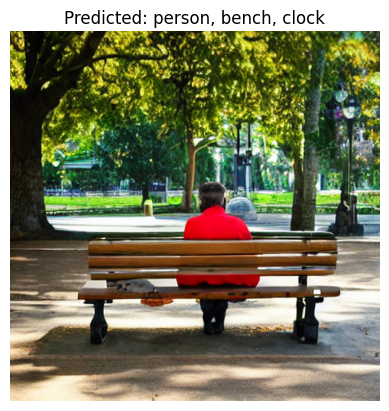

In [77]:

sample = all_results[90]
visualize_prediction(os.path.join(IMAGE_DIR, sample["image"]), sample["objects"])
